In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import math
import random
from random import uniform
from sklearn import preprocessing
from sklearn import tree

# Exercise 1 : simple dataset with 2 features (same as previous TP)

## Load the data

In [2]:
# We will load the data that is in the file 'donnees_exo1.txt'
data = pd.read_csv('donnees_exo1.txt', sep = ' ')
data

X1        X2  Y
0   -0.697580  0.684940  0
1   -0.478690  0.633770  1
2    0.057028  0.918860  0
3   -0.593890  0.494880  0
4    0.229840 -0.411550  1
..        ...       ... ..
113  0.460250  0.012427  1
114 -0.046659  0.816520  1
115  0.322000  0.692250  1
116 -0.524770  0.209800  1
117 -0.599650 -0.418860  0

[118 rows x 3 columns]

## Train / Valid / Test split

In [60]:
data_train, data_test = train_test_split(data, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)
# 82 examples in train, 18 in valid and 18 in test

## Plotting the training set

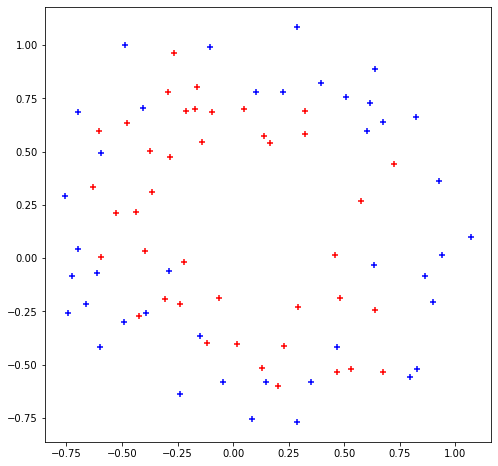

In [82]:
color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
fig = plt.figure(figsize=  (8,8))
fig = plt.scatter(data_train.iloc[:,0], data_train.iloc[:,1], c = data_train.Y, cmap = color_map, marker='+')

## Fitting a decision tree

In [77]:
# The basic decision tree can be obtained easily by this command
dt = tree.DecisionTreeClassifier().fit(data_train.iloc[:,:2],data_train.Y)
# More advanced options can be inserted into the 'DecisionTreeClassifier' function (we will see some later)
# The 'fit' function needs to have 2 parameters (at least) : 
# - the set of features describing the examples (here the 2 first columns of our train set)
# - the associated labels (classes, here the column 'Y' of our train set)


## Visualizing the obtained tree

[Text(711.4499999999999, 467.0018181818182, 'X[0] <= 0.76\ngini = 0.5\nsamples = 82\nvalue = [41, 41]'),
 Text(655.65, 422.5254545454545, 'X[0] <= -0.646\ngini = 0.494\nsamples = 74\nvalue = [33, 41]'),
 Text(599.85, 378.0490909090909, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(711.4499999999999, 378.0490909090909, 'X[1] <= 0.703\ngini = 0.479\nsamples = 68\nvalue = [27, 41]'),
 Text(362.7, 333.5727272727273, 'X[1] <= -0.558\ngini = 0.427\nsamples = 55\nvalue = [17, 38]'),
 Text(111.6, 289.09636363636366, 'X[0] <= 0.175\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(55.8, 244.62, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(167.39999999999998, 244.62, 'X[0] <= 0.244\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(111.6, 200.14363636363635, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.2, 200.14363636363635, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(613.8, 289.09636363636366, 'X[1] <= -0.024\ngini = 0.353\nsamples = 48\nvalue = [11, 37]'),
 Text(390.

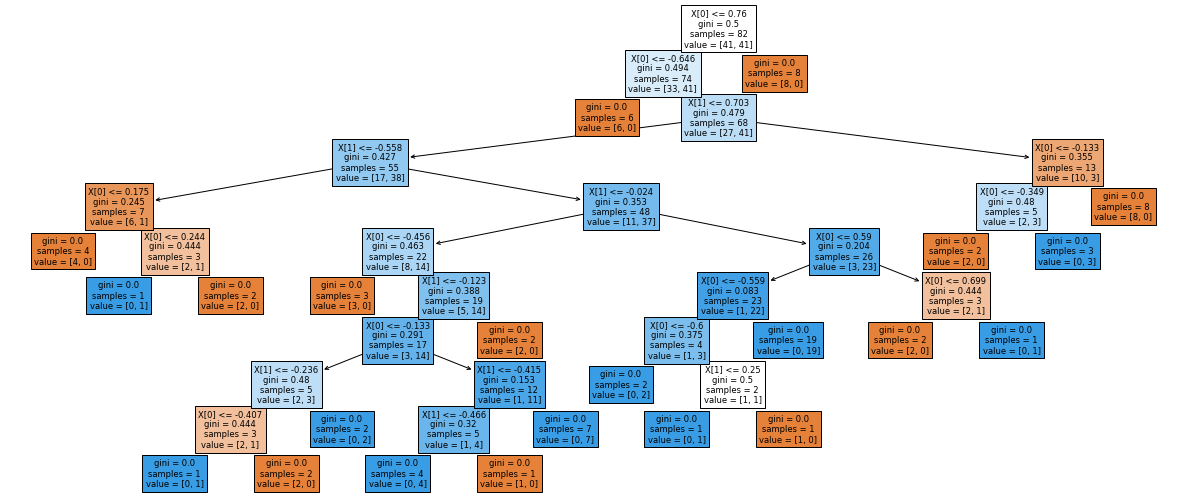

In [63]:
plt.figure(figsize=(21, 9))
tree.plot_tree(dt, filled=True)
# The 'plot_tree' function outputs two things : 
# - a text version of the tree (where are written the informations about all the nodes of the tree)
# - a graphical representation of the tree (right branches correspond to answer 'no' and left branches 'yes')

In [65]:
# We can obtain automatically the prediction of the tree for any example with the 'predict' command (as for logistic regression):
dt.predict(data_train.iloc[:1,:2]) # here I ask to predict the first example of the train set, need to give its features

1.0

In [67]:
def draw_boundary_tree(model, data, x_min, x_max, y_min, y_max):
    h = 0.05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    zz = np.c_[xx.ravel(), yy.ravel()]
    zz = pd.DataFrame(zz)
    zz2 = zz
    pred_zz= pd.Series(model.predict(zz2))
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
    fig = plt.figure(figsize=  (8,8))
    fig = plt.scatter(zz.iloc[:,0], zz.iloc[:,1], c = pred_zz, cmap = color_map, marker='+')
    fig = plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 50, c = data.iloc[:,2], cmap = color_map)

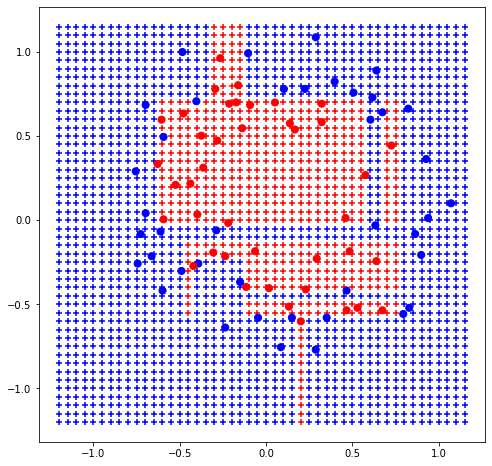

In [68]:
draw_boundary_tree(dt, data_train, -1.2, 1.2, -1.2, 1.2)

## Pruning the tree

In [85]:
clf = tree.DecisionTreeClassifier() # first declare a tree
path = clf.cost_complexity_pruning_path(data_train.iloc[:,0:2], data_train.Y) # then ask for all the possible values 
# of alpha to prune this tree (depends on the training set)
path

{'ccp_alphas': array([0.        , 0.0077766 , 0.01045296, 0.01117886, 0.01263351,
        0.01626016, 0.02513799, 0.02727425, 0.02814259, 0.05398197,
        0.05405405]),
 'impurities': array([0.        , 0.0233298 , 0.04423572, 0.06659345, 0.10449397,
        0.12075413, 0.14589213, 0.22771487, 0.28400004, 0.44594595,
        0.5       ])}

Text(0, 0.5, 'total impurity of leaves')

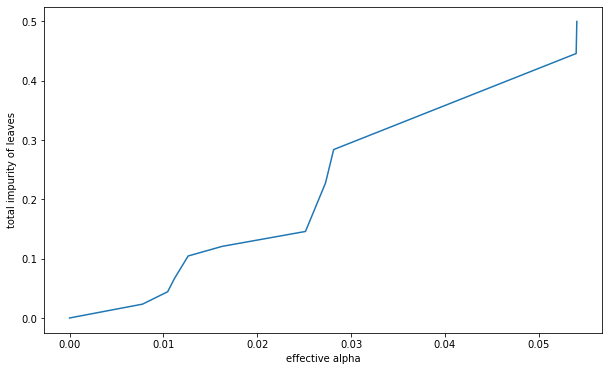

In [71]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [88]:
dt_pruned = tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[2]).fit(data_train.iloc[:,0:2], data_train.Y)
# Here I asked for the third value from all the possible alpha (the first one is 0, already done with the basic tree)

# Exercise 2 : with a real dataset of handwritten digits

In [13]:
mnist = pd.read_csv('cp_sample.csv', sep=';')
mnist.shape

(1000, 785)

In [131]:
# The values of pixels and label for one image can be obtained by the command:
mnist.iloc[0,:] # First image of the dataset
# You can see that the label is in the column 'label' and the other columns are pixel0, pixel1, etc...
# This first image represents the digit 1

label       1
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 785, dtype: int64

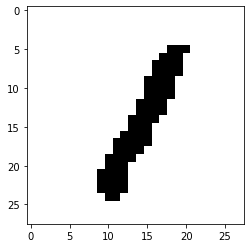

In [132]:
# It is possible to see an image from its pixel values using the following command:
plt.imshow(mnist.iloc[0,1:].to_numpy().reshape(28,28),cmap = 'Greys')
# Here is the first image, representing a 1

In [17]:
Question : Split this dataset into train / validation / test sets

## Trying the model on your own written image 

In [142]:
import skimage.io
def read_myimage(f):
    myimage = skimage.io.imread(f, as_gray=True)
    i0 = np.where(myimage==0)
    i1 = np.where(myimage == 1)
    myimage[i0] = 1
    myimage[i1] = 0
    plt.imshow(myimage, cmap='Greys')
    return myimage.reshape(1,28*28)

array([7])

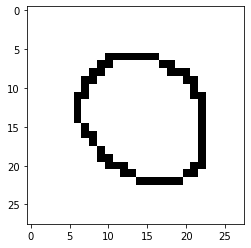

In [147]:
myim = read_myimage('test_0.png')
dt.predict(myim) # if dt is the name of your model

## Logistic regression for the same task

# Using HOG representation rather than pixel values

In [ ]:
from skimage.feature import hog

In [152]:
myimage = mnist.iloc[0,1:] # first image of the mnist dataset (784 pixel values)
myimage_hog = hog(myimage.to_numpy().reshape(28,28,1), orientations=8, pixels_per_cell=(14,14), cells_per_block=(1,1))
myimage_hog

array([0.70710678, 0.        , 0.70710678, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.63453054, 0.        ,
       0.63453054, 0.        , 0.44129581, 0.        , 0.        ,
       0.        , 0.59539679, 0.        , 0.59539679, 0.        ,
       0.23002187, 0.        , 0.48795006, 0.        , 0.70710678,
       0.        , 0.70710678, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [155]:
def my_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(28,28,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(1,1))))

In [156]:
hog_train = data_train.apply(my_hog, axis=1, args=(8,14))
hog_valid= data_valid.apply(my_hog, axis=1, args=(8,14))
hog_test = data_test.apply(my_hog, axis=1, args=(8,14))
hog_train['label'] = data_train.label
hog_valid['label'] = data_valid.label
hog_test['label'] = data_test.label

In [157]:
hog_train
# you see here that each image of the training set is now a vector of length 32

0    1         2    3         4    5         6    7         8  \
715  0.502681  0.0  0.502681  0.0  0.491869  0.0  0.502681  0.0  0.331770   
920  0.699372  0.0  0.699372  0.0  0.147506  0.0  0.000000  0.0  0.500000   
295  0.465444  0.0  0.618883  0.0  0.618883  0.0  0.131647  0.0  0.500000   
83   0.517744  0.0  0.517744  0.0  0.517744  0.0  0.442518  0.0  0.568812   
942  0.604642  0.0  0.604642  0.0  0.377247  0.0  0.355672  0.0  0.603838   
..        ...  ...       ...  ...       ...  ...       ...  ...       ...   
897  0.577350  0.0  0.577350  0.0  0.577350  0.0  0.000000  0.0  0.555912   
709  0.000000  0.0  1.000000  0.0  0.000000  0.0  0.000000  0.0  0.615943   
439  0.707107  0.0  0.707107  0.0  0.000000  0.0  0.000000  0.0  0.566947   
174  0.500000  0.0  0.500000  0.0  0.500000  0.0  0.500000  0.0  0.197028   
122  0.573376  0.0  0.573376  0.0  0.573376  0.0  0.117137  0.0  0.500000   

       9  ...   23        24   25        26   27        28   29        30  \
715  0.0  ...  0.0  0.500000  0.0  0.500000  0.0  0.500000  0.0  0.500000   
920  0.0  ...  0.0  0.681478  0.0  0.681478  0.0  0.000000  0.0  0.266785   
295  0.0  ...  0.0  0.307510  0.0  0.543607  0.0  0.552236  0.0  0.552236   
83   0.0  ...  0.0  0.577350  0.0  0.577350  0.0  0.577350  0.0  0.000000   
942  0.0  ...  0.0  0.577350  0.0  0.577350  0.0  0.577350  0.0  0.000000   
..   ...  ...  ...       ...  ...       ...  ...       ...  ...       ...   
897  0.0  ...  0.0  0.572579  0.0  0.572579  0.0  0.572579  0.0  0.128290   
709  0.0  ...  0.0  0.656532  0.0  0.754298  0.0  0.000000  0.0  0.000000   
439  0.0  ...  0.0  0.558947  0.0  0.558947  0.0  0.558947  0.0  0.250470   
174  0.0  ...  0.0  0.500000  0.0  0.500000  0.0  0.500000  0.0  0.500000   
122  0.0  ...  0.0  0.485965  0.0  0.504591  0.0  0.504591  0.0  0.504591   

      31  label  
715  0.0      8  
920  0.0      9  
295  0.0      2  
83   0.0      0  
942  0.0      4  
..   ...    ...  
897  0.0      0  
709  0.0      1  
439  0.0      0  
174  0.0      5  
122  0.0      3  

[700 rows x 33 columns]